In [21]:
import csv
import matplotlib.pyplot as plt

def calculate_k(csv_file, totalizer, first_timestamp):
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)

        if len(rows) == 0:
            return None

        timestamp_values = [float(row['Timestamp']) for row in rows]
        volume_flow_values = [float(row['Volume Flow']) for row in rows]

        plt.plot(timestamp_values, volume_flow_values)
        plt.xlabel('time')
        plt.ylabel('volume flow')
        plt.grid(True)
        plt.show()

        mean_volume_flow = sum(volume_flow_values) / len(volume_flow_values)
        last_timestamp = timestamp_values[-1]
        result = totalizer / (mean_volume_flow * (last_timestamp-first_timestamp))
        return result, mean_volume_flow
    
def calculate_ks(paths):#, totalizer, first_timestamp):
    means = []
    k = []
    plt.figure(figsize=(10, 6))

    for path in paths:
        csv_file = path[0]
        totalizer = path[1]
        first_timestamp = path[2]
        with open(csv_file, 'r') as file:
            reader = csv.DictReader(file)
            rows = list(reader)

            if len(rows) == 0:
                return None

            timestamp_values = [float(row['Timestamp']) for row in rows]
            volume_flow_values = [float(row['Volume Flow']) for row in rows]

            plt.plot(timestamp_values, volume_flow_values, label=csv_file)
            #plt.xlabel('time')
            #plt.ylabel('volume flow')
            #plt.grid(True)
            #plt.show()

            mean_volume_flow = sum(volume_flow_values) / len(volume_flow_values)
            means.append(mean_volume_flow)
            last_timestamp = timestamp_values[-1]
            result = 3600 * totalizer / (mean_volume_flow * (last_timestamp-first_timestamp))
            k.append(result)
    plt.xlabel('time')
    plt.ylabel('volume flow')
    plt.grid(True)
    plt.legend(prop={'size': 8},loc='lower right')
    plt.show()

    plt.plot(means, k, 'o')
    plt.xlabel('volume flow mean')
    plt.ylabel('k')
    plt.grid(True)
    plt.show()
    return means, k

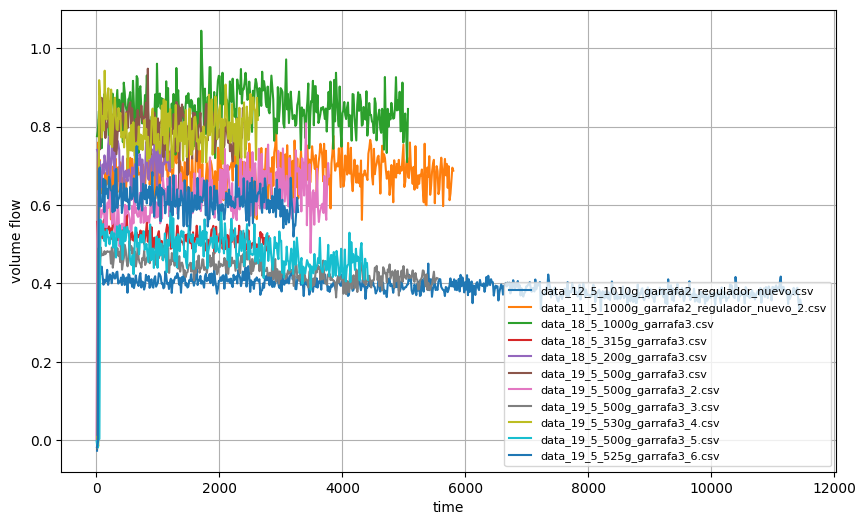

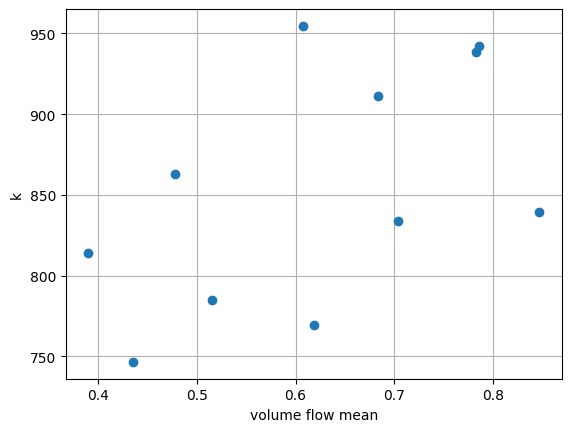

([0.38999036219738276,
  0.6839859442498708,
  0.8467001830352068,
  0.5154988497978608,
  0.7041843693439028,
  0.7857976773865853,
  0.6188786321972334,
  0.4354164329713507,
  0.7831598772388566,
  0.4777007022145762,
  0.6079722365287672],
 [814.2539773516436,
  910.9914129827212,
  839.1326585741288,
  785.1310414152,
  833.8154085892382,
  942.236155108078,
  769.1041991725155,
  746.5398891801692,
  938.4342296160033,
  862.8476971841095,
  954.6221834834031])

In [26]:
# Usage example
#file_path_0 = 'data_11_5_1000g_garrafa2_regulador_nuevo.csv'  
#k_value_0 = calculate_k(file_path_0, 1000, 30.65)
#file_path_1 = 'data_11_5_1000g_garrafa2_regulador_nuevo_2.csv'  
#k_value_1 = calculate_k(file_path_1, 1000, 25.91)
#file_path_2 = 'data_12_5_1010g_garrafa2_regulador_nuevo.csv'  
#k_value_2 = calculate_k(file_path_2, 1010, 24.71)

#print("k value 0:", k_value_0)
#print("k value 1:", k_value_1)
#print("k value 2:", k_value_2)

calculate_ks([['medidas/data_12_5_1010g_garrafa2_regulador_nuevo.csv',1010,9.7], 
              ['medidas/data_11_5_1000g_garrafa2_regulador_nuevo_2.csv', 1000, 25.91],
              ['medidas/data_18_5_1000g_garrafa3.csv', 1000, 0],
              ['medidas/data_18_5_315g_garrafa3.csv', 315, 0],
              ['medidas/data_18_5_200g_garrafa3.csv', 200, 0],
              ['medidas/data_19_5_500g_garrafa3.csv',500,25.58],
              ['medidas/data_19_5_500g_garrafa3_2.csv',500,1.2],
              ['medidas/data_19_5_500g_garrafa3_3.csv',500,11.32],
              ['medidas/data_19_5_530g_garrafa3_4.csv',530,29.24],
              ['medidas/data_19_5_500g_garrafa3_5.csv',500,48.41],
              ['medidas/data_19_5_525g_garrafa3_6.csv',525,23.52]])
              #['data_18_5_155g_error_com.csv', 155, 0],
              #['data_18_5_210g.csv', 210, 0],])